In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate a Smaple Dataset

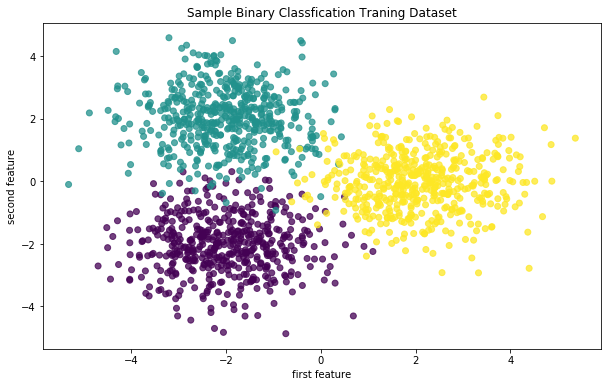

In [2]:
# training set 
N = 500
np.random.seed(2020)
mean_class0 = np.array([-2,-2])
cov_class0 = np.array([[1,0],[0,1]])
x0 = np.random.multivariate_normal(mean=mean_class0, cov=cov_class0, size=N)
y0 = np.zeros(N, dtype=int)

mean_class1 = np.array([-2,2])
cov_class1 = np.array([[1,0],[0,1]])
x1 = np.random.multivariate_normal(mean=mean_class1, cov=cov_class1, size=N)
y1 = np.ones(N, dtype=int)

mean_class2 = np.array([2,0])
cov_class2 = np.array([[1,0],[0,1]])
x2 = np.random.multivariate_normal(mean=mean_class2, cov=cov_class2, size=N)
y2 = np.full(N, 2, dtype=int)

X_train = np.vstack((x0,x1,x2))
y_train = np.concatenate((y0,y1,y2))

fig = plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.75)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.title("Sample Binary Classfication Traning Dataset")
plt.show()

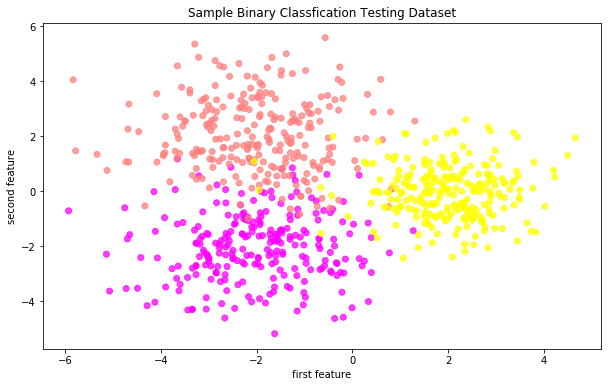

In [3]:
# testing set
N = 250
np.random.seed(2019)
mean_class0 = np.array([-2,-2])
cov_class0 = np.array([[1.5,0],[0,1.5]])
x0 = np.random.multivariate_normal(mean=mean_class0, cov=cov_class0, size=N)
y0 = np.zeros(N, dtype=int)

mean_class1 = np.array([-2,2])
cov_class1 = np.array([[1.5,0],[0,1.5]])
x1 = np.random.multivariate_normal(mean=mean_class1, cov=cov_class1, size=N)
y1 = np.ones(N, dtype=int)

mean_class2 = np.array([2,0])
cov_class2 = np.array([[1,0],[0,1]])
x2 = np.random.multivariate_normal(mean=mean_class2, cov=cov_class2, size=N)
y2 = np.full(N, 2, dtype=int)

X_test = np.vstack((x0,x1,x2))
y_test = np.concatenate((y0,y1,y2))

fig = plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.75, cmap=plt.cm.spring)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.title("Sample Binary Classfication Testing Dataset")
plt.show()

### Implementation

In [4]:
class Naive_Bayes():
    def __init__(self):
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        def separate_by_class(X_train, y_train):
            class_conditional = dict()
            n = X_train.shape[0]
            for i in range(n):
                feature = list(X_train[i])
                label = y_train[i]
                if (label not in class_conditional):
                    class_conditional[label] = list()
                class_conditional[label].append(feature)
            return class_conditional
        
        def MLE(X_train, y_train):
            MLE_estimator = dict()
            data_seperated = separate_by_class(X_train, y_train)
            for label, feature in data_seperated.items():
                avg = np.mean(feature, axis=0)
                variance = np.var(feature, axis=0)
                prior = len(feature) / X_train.shape[0]
                MLE_estimator[label] = {"mean": list(avg), "var": list(variance), "prior":prior}
            return MLE_estimator  
        
        self.X_train = X_train
        self.y_train = y_train
        self.estimators = MLE(self.X_train, self.y_train)
        
    @staticmethod    
    def Gussian_density(x, mu, sigma):
        return np.exp(-(x-mu)**2/(2*sigma**2))*(1/(np.sqrt(2*np.pi)*sigma))
    
    def predict(self, X_test):
        prob = dict()    
        for i in range(X_test.shape[0]):
            obs = X_test[i]
            for label, estimators in self.estimators.items():
                if (label not in prob):
                    prob[label]  = list()
                likelihood = 1
                mean = estimators["mean"]
                var = estimators["var"]
                prior = estimators["prior"]
                for j in range(len(obs)):
                    likelihood *= Naive_Bayes.Gussian_density(obs[j], mean[j], np.sqrt(var[j]))
                prob[label].append(likelihood * prior)
        probility = [v for v in prob.values()]
        labels = [label for label in prob]
        label_pred = [labels[i] for i in np.argmax(probility, axis=0)]
        label_pred = np.array(label_pred)
        return label_pred

In [5]:
# fit the model and predict
nb = Naive_Bayes()
nb.fit(X_train, y_train)
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

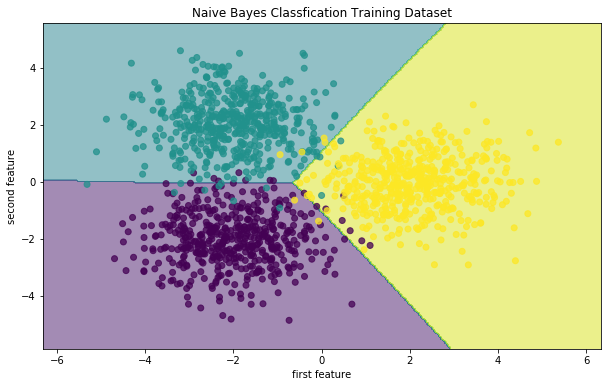

In [6]:
# Visulize the traning set results 
x0_features = np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.05)
x1_features = np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.05)
x0_features, x1_features = np.meshgrid(x0_features, x1_features)
X_grid = np.column_stack((x0_features.flatten(), x1_features.flatten()))
grid_pred = nb.predict(X_grid)
grid_pred = grid_pred.reshape(x0_features.shape)
fig = plt.figure(figsize=(10,6))
plt.contourf(x0_features, x1_features, grid_pred, alpha=0.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.75)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.title("Naive Bayes Classfication Training Dataset")
plt.show()

In [7]:
accuracy_train = sum(y_train == y_pred_train) / len(y_train)
print("The training acuracy is {}".format(accuracy_train))

The training acuracy is 0.9773333333333334


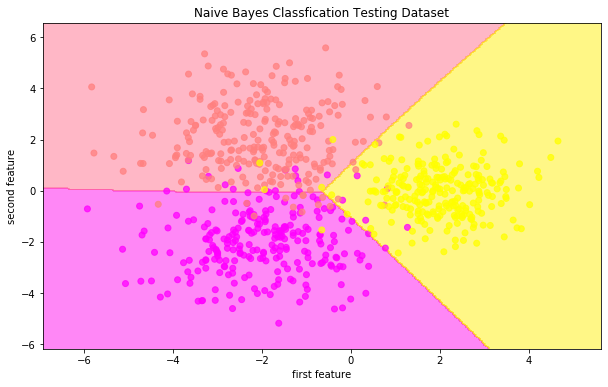

In [8]:
# Visulize the testing set results 
x0_features = np.arange(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1, 0.05)
x1_features = np.arange(X_test[:, 1].min() - 1, X_test[:, 1].max() + 1, 0.05)
x0_features, x1_features = np.meshgrid(x0_features, x1_features)
X_grid = np.column_stack((x0_features.flatten(), x1_features.flatten()))
grid_pred = nb.predict(X_grid)
grid_pred = grid_pred.reshape(x0_features.shape)
fig = plt.figure(figsize=(10,6))
plt.contourf(x0_features, x1_features, grid_pred, alpha=0.5, cmap=plt.cm.spring)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.75, cmap=plt.cm.spring)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.title("Naive Bayes Classfication Testing Dataset")
plt.show()

In [9]:
accuracy_test = sum(y_test == y_pred_test) / len(y_test)
print("The testing acuracy is {}".format(accuracy_test))

The testing acuracy is 0.9413333333333334


### Compare with sk.learn

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

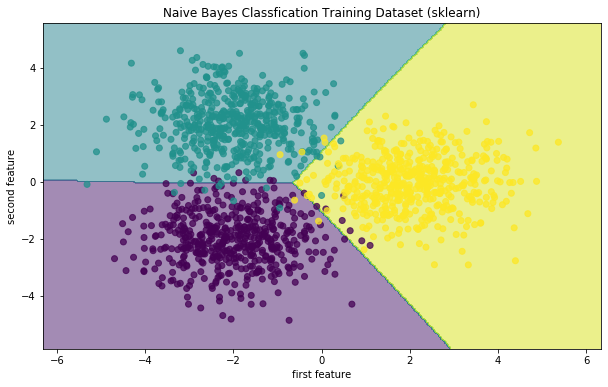

In [12]:
# Visulize the traning set results 
x0_features = np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.05)
x1_features = np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.05)
x0_features, x1_features = np.meshgrid(x0_features, x1_features)
X_grid = np.column_stack((x0_features.flatten(), x1_features.flatten()))
grid_pred = nb.predict(X_grid)
grid_pred = grid_pred.reshape(x0_features.shape)
fig = plt.figure(figsize=(10,6))
plt.contourf(x0_features, x1_features, grid_pred, alpha=0.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.75)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.title("Naive Bayes Classfication Training Dataset (sklearn)")
plt.show()

In [13]:
accuracy_train = sum(y_train == y_pred_train) / len(y_train)
print("The training acuracy is {}".format(accuracy_train))

The training acuracy is 0.9773333333333334


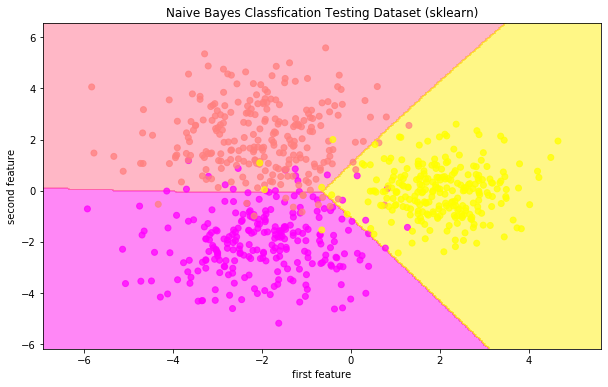

In [14]:
# Visulize the testing set results 
x0_features = np.arange(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1, 0.05)
x1_features = np.arange(X_test[:, 1].min() - 1, X_test[:, 1].max() + 1, 0.05)
x0_features, x1_features = np.meshgrid(x0_features, x1_features)
X_grid = np.column_stack((x0_features.flatten(), x1_features.flatten()))
grid_pred = nb.predict(X_grid)
grid_pred = grid_pred.reshape(x0_features.shape)
fig = plt.figure(figsize=(10,6))
plt.contourf(x0_features, x1_features, grid_pred, alpha=0.5, cmap=plt.cm.spring)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.75, cmap=plt.cm.spring)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.title("Naive Bayes Classfication Testing Dataset (sklearn)")
plt.show()

In [15]:
accuracy_test = sum(y_test == y_pred_test) / len(y_test)
print("The testing acuracy is {}".format(accuracy_test))

The testing acuracy is 0.9413333333333334
